## Explore restaurants data

### This notebook shows on the nuisances of data processing

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Check if the counts in the input file and data frame are matching
!wc data/restaurants/tripadvisor_in-restaurant_sample.csv

  18802  316159 6912444 data/restaurants/tripadvisor_in-restaurant_sample.csv


In [4]:
df = pd.read_csv("data/restaurants/restaurants-on-tripadvisor.zip",compression='zip',encoding='utf-8')

In [5]:
len(df)

18000

In [6]:
len(df.columns)

28

In [7]:
# Check the data types of the columns
df.dtypes

Restaurant ID          object
Restaurant URL         object
Name                   object
Address                object
Phone                  object
City                   object
State                  object
Country                object
Neighbourhood          object
Email ID               object
Menu                  float64
Website                object
Latitude              float64
Longitude             float64
About Restaurant       object
Cuisine                object
Good for(suitable)     object
Price                  object
Currency               object
Rating                 object
Ranking                object
Deal(Promotion)       float64
Total Review          float64
Last Reviewed          object
Recommended           float64
Dining Option          object
Award                  object
Uniq Id                object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Restaurant ID       18000 non-null  object 
 1   Restaurant URL      17994 non-null  object 
 2   Name                17991 non-null  object 
 3   Address             17978 non-null  object 
 4   Phone               15566 non-null  object 
 5   City                17004 non-null  object 
 6   State               17993 non-null  object 
 7   Country             17996 non-null  object 
 8   Neighbourhood       650 non-null    object 
 9   Email ID            858 non-null    object 
 10  Menu                0 non-null      float64
 11  Website             8576 non-null   object 
 12  Latitude            17442 non-null  float64
 13  Longitude           17442 non-null  float64
 14  About Restaurant    937 non-null    object 
 15  Cuisine             7553 non-null   object 
 16  Good

In [9]:
(len(df)-df.isnull().sum())*100/len(df)

Restaurant ID         100.000000
Restaurant URL         99.966667
Name                   99.950000
Address                99.877778
Phone                  86.477778
City                   94.466667
State                  99.961111
Country                99.977778
Neighbourhood           3.611111
Email ID                4.766667
Menu                    0.000000
Website                47.644444
Latitude               96.900000
Longitude              96.900000
About Restaurant        5.205556
Cuisine                41.961111
Good for(suitable)      6.661111
Price                   9.466667
Currency                9.450000
Rating                  0.044444
Ranking                56.294444
Deal(Promotion)         0.000000
Total Review           59.227778
Last Reviewed          58.300000
Recommended             0.000000
Dining Option          12.216667
Award                   3.988889
Uniq Id               100.000000
dtype: float64

In [10]:
df[df["Uniq Id"] == "bfc127bb137c9aa4628c0659e0dce2d5"]

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Currency,Rating,Ranking,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
1547,4\r159832,http://www.tripadvisor.in/Restaurant_Review-g6...,Europe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bfc127bb137c9aa4628c0659e0dce2d5


In [11]:
# select sub set of columns that can be checked for null and remove any such records
major_columns = ['Restaurant ID','Restaurant URL','Name','Uniq Id']
col_na = [col_name for col_name in list(df.columns) if col_name not in major_columns]

In [12]:
print(col_na)

['Address', 'Phone', 'City', 'State', 'Country', 'Neighbourhood', 'Email ID', 'Menu', 'Website', 'Latitude', 'Longitude', 'About Restaurant', 'Cuisine', 'Good for(suitable)', 'Price', 'Currency', 'Rating', 'Ranking', 'Deal(Promotion)', 'Total Review', 'Last Reviewed', 'Recommended', 'Dining Option', 'Award']


In [ ]:
len(df)

In [13]:
# drop all of the rows where subset of columns are completely null
df1 = df.dropna(axis=0,subset=col_na,how='all')

In [14]:
len(df1)

17996

In [15]:
len(df1.columns)

28

In [16]:
# drop those columns that are completely null
df2 = df1.dropna(axis=1,how='all').copy()

In [17]:
len(df2)

17996

In [18]:
len(df2.columns)

25

In [19]:
df2.head()

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Good for(suitable),Price,Currency,Rating,Ranking,Total Review,Last Reviewed,Dining Option,Award,Uniq Id
0,1345154,http://www.tripadvisor.in/Restaurant_Review-g1...,Gaststatte Gunter Jung,"Hintergasse 38, 61231 Bad Nauheim, Hesse, Germany",+49 6032 81796,Bad Nauheim,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,40 of 61,1.0,- 28 May 2012,NaN,NaN,030c4d068d2d59518db5de6ebb9ecdd6
1,5818482,http://www.tripadvisor.in/Restaurant_Review-g1...,TurQuaz Shisha Lounge & Thorizzio da Bambi Lie...,"Frankfurter Strasse 49, 63571 Gelnhausen, Hess...",06051 8877462,Gelnhausen,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6e160a28f7d9beeee848a35bd947477c
2,959812,http://www.tripadvisor.in/Restaurant_Review-g2...,Zum Schrebergarten,"Lampertheimer Str. 90, Viernheim, Hesse, Germany",06204-72892,Viernheim,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,24 of 53,2.0,- 6 Feb 2008,NaN,NaN,cf8fedd0a87f95cc1bd9c5f7a3561e82
3,5826288,http://www.tripadvisor.in/Restaurant_Review-g1...,"Zum Taubenschlag - ""Magda"" Fruher ""Poldi""","Wilhelm-Leuschner-Str. 19, 64653 Lorsch, Hesse...",06251/57234,Lorsch,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d7e080df070caeeeb0615b436a46802a
4,1848931,http://www.tripadvisor.in/Restaurant_Review-g1...,Zum Gruenen Wald,"Friedrich-Ebert-Str. 19, 61476 Kronberg im Ta...",061732011,Kronberg im Taunus,Hesse,Germany,NaN,NaN,...,NaN,7 - 27,€,NaN,1 of 24,28.0,11 March 2014,"Lunch Spot, Dinner, Reservations",NaN,e9fcebcaa1e77ed0f5f55f0ebddd2f1a


In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17996 entries, 0 to 17999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Restaurant ID       17996 non-null  object 
 1   Restaurant URL      17990 non-null  object 
 2   Name                17990 non-null  object 
 3   Address             17978 non-null  object 
 4   Phone               15566 non-null  object 
 5   City                17004 non-null  object 
 6   State               17993 non-null  object 
 7   Country             17996 non-null  object 
 8   Neighbourhood       650 non-null    object 
 9   Email ID            858 non-null    object 
 10  Website             8576 non-null   object 
 11  Latitude            17442 non-null  float64
 12  Longitude           17442 non-null  float64
 13  About Restaurant    937 non-null    object 
 14  Cuisine             7553 non-null   object 
 15  Good for(suitable)  1199 non-null   object 
 16  Pric

In [21]:
df2['Total Review'].value_counts().iloc[0:21]

1.0     2469
2.0     1287
3.0      867
4.0      558
5.0      462
6.0      378
7.0      316
8.0      269
9.0      247
10.0     216
11.0     201
12.0     180
13.0     143
15.0     142
14.0     130
16.0     129
17.0     125
18.0     100
19.0      98
20.0      90
22.0      83
Name: Total Review, dtype: int64

In [22]:
df2['Total Review'].value_counts().iloc[0:21].sum()

8490

In [23]:
df2['Total Review'].value_counts().iloc[0:21]

1.0     2469
2.0     1287
3.0      867
4.0      558
5.0      462
6.0      378
7.0      316
8.0      269
9.0      247
10.0     216
11.0     201
12.0     180
13.0     143
15.0     142
14.0     130
16.0     129
17.0     125
18.0     100
19.0      98
20.0      90
22.0      83
Name: Total Review, dtype: int64

In [24]:
df2.columns

Index(['Restaurant ID', 'Restaurant URL', 'Name', 'Address', 'Phone', 'City',
       'State', 'Country', 'Neighbourhood', 'Email ID', 'Website', 'Latitude',
       'Longitude', 'About Restaurant', 'Cuisine', 'Good for(suitable)',
       'Price', 'Currency', 'Rating', 'Ranking', 'Total Review',
       'Last Reviewed', 'Dining Option', 'Award', 'Uniq Id'],
      dtype='object')

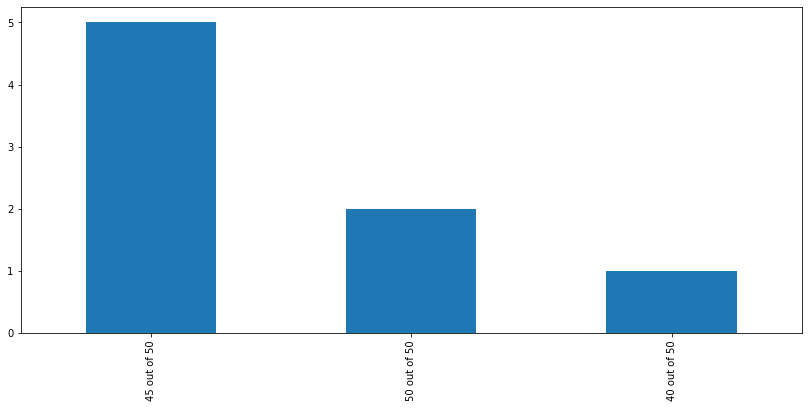

In [25]:
# Top 20 reviews
df2['Rating'].value_counts().iloc[0:21].plot(kind='bar',figsize=(14,6))

In [ ]:
# incase if you want to consider the columns having data populated > 60%
#cols = [col for col in list(df.columns) if col not in list(df_col[df_col > 60].index)]

In [29]:
df1.head(2)

,Restaurant ID,Restaurant URL,Name,Address,Phone,City,State,Country,Neighbourhood,Email ID,...,Currency,Rating,Ranking,Deal(Promotion),Total Review,Last Reviewed,Recommended,Dining Option,Award,Uniq Id
0,1345154,http://www.tripadvisor.in/Restaurant_Review-g1...,Gaststatte Gunter Jung,"Hintergasse 38, 61231 Bad Nauheim, Hesse, Germany",+49 6032 81796,Bad Nauheim,Hesse,Germany,NaN,NaN,...,NaN,NaN,40 of 61,NaN,1.0,- 28 May 2012,NaN,NaN,NaN,030c4d068d2d59518db5de6ebb9ecdd6
1,5818482,http://www.tripadvisor.in/Restaurant_Review-g1...,TurQuaz Shisha Lounge & Thorizzio da Bambi Lie...,"Frankfurter Strasse 49, 63571 Gelnhausen, Hess...",06051 8877462,Gelnhausen,Hesse,Germany,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6e160a28f7d9beeee848a35bd947477c


In [30]:
df['Ranking'].head()

0    40 of 61
1         NaN
2    24 of 53
3         NaN
4     1 of 24
Name: Ranking, dtype: object

In [31]:
df.Country.value_counts()

United States    12851
Germany           2549
Brazil            1661
England            431
Scotland           356
Canada              68
France              44
Switzerland         29
Wales                2
South America        1
Europe               1
Austria              1
Mexico               1
Africa               1
Name: Country, dtype: int64

In [32]:
df[df.Country=="United States"]["State"].value_counts()

FL              3132
CA              2985
AL              1509
WA              1295
MA              1291
MI               936
MN               429
AR               282
RI               248
SD               235
CO               224
ME                74
MS                36
IA                27
OR                25
GA                22
ND                15
ID                13
NH                10
TN                 9
WI                 8
NV                 7
NE                 7
MO                 6
OH                 5
CT                 4
TX                 3
OK                 2
Harrison           1
Gainesville        1
Lutsen             1
White Salmon       1
LA                 1
Platte             1
Woburn             1
Birmingham         1
Sacramento         1
Mitchell           1
Name: State, dtype: int64

In [33]:
df_usa = df[df.Country=="United States"]

In [34]:
# Select only those records with valid state codes, STATE code that has lenght of 2
df_usa_state = df_usa[df_usa.State.str.len() == 2]

In [35]:
df_usa_state.State.value_counts()

FL    3132
CA    2985
AL    1509
WA    1295
MA    1291
MI     936
MN     429
AR     282
RI     248
SD     235
CO     224
ME      74
MS      36
IA      27
OR      25
GA      22
ND      15
ID      13
NH      10
TN       9
WI       8
NE       7
NV       7
MO       6
OH       5
CT       4
TX       3
OK       2
LA       1
Name: State, dtype: int64

In [36]:
df_usa_state.State.value_counts()[0:10]

FL    3132
CA    2985
AL    1509
WA    1295
MA    1291
MI     936
MN     429
AR     282
RI     248
SD     235
Name: State, dtype: int64

In [37]:
pd.to_datetime(df2['Last Reviewed']).head()

0   2012-05-28
1          NaT
2   2008-02-06
3          NaT
4   2014-03-11
Name: Last Reviewed, dtype: datetime64[ns]

In [38]:
# Last Reviewed column contains data values in the format dd Mon Year
df2["Last Reviewed"].head(10)

0    - 28 May 2012
1              NaN
2     - 6 Feb 2008
3              NaN
4    11 March 2014
5              NaN
6    - 20 Apr 2014
7      9 June 2014
8     - 1 Jun 2014
9              NaN
Name: Last Reviewed, dtype: object

In [39]:
# This function extract the day, month, year part of the date column
def get_split_value(value,index):
    value = str(value)
    value = value.replace("- ","")
    fields = value.split()
    month = ""
    try:
        month = fields[index]
    except TypeError:
        month = ""
    except IndexError:
        month = ""
    return month

In [45]:
# Let's check if the date values in Last Reviewed column are having valid values
# check Day
days = df2["Last Reviewed"].apply(lambda x:get_split_value(x,1)).value_counts().sort_index(ascending=True)
print(sorted([ int(x) for x in list(days.values) if x != 'nan']))

[67, 68, 69, 75, 92, 113, 123, 210, 218, 267, 315, 360, 397, 412, 420, 450, 494, 536, 565, 586, 902, 1065, 2690, 7502]


In [44]:
days

             7502
Apr          1065
April         397
Aug           315
August         68
Dec           420
December       92
Feb           494
February      123
Jan           536
January       113
Jul           586
July          267
Jun           565
June          210
Mar           902
March         218
May          2690
Nov           412
November       67
Oct           450
October        75
Sep           360
September      69
Name: Last Reviewed, dtype: int64

In [46]:
# check Month
months = df2["Last Reviewed"].apply(lambda x:get_split_value(x,1)).value_counts().sort_index(ascending=True)
print(sorted(list(months.index)))

['', 'Apr', 'April', 'Aug', 'August', 'Dec', 'December', 'Feb', 'February', 'Jan', 'January', 'Jul', 'July', 'Jun', 'June', 'Mar', 'March', 'May', 'Nov', 'November', 'Oct', 'October', 'Sep', 'September']


In [47]:
# check Year
years = df2["Last Reviewed"].apply(lambda x:get_split_value(x,2)).value_counts().sort_index(ascending=True)
print(list(years.index))

['', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014']


In [48]:
df2["Last Reviewed"].apply(lambda x:get_split_value(x,2)).value_counts()

        7502
2014    6738
2013    2712
2012     666
2011     175
2008      70
2010      64
2009      39
2007      21
2005       4
2004       3
2006       2
Name: Last Reviewed, dtype: int64

In [49]:
df2['last_reviewed_dt'] = pd.to_datetime(df2["Last Reviewed"])

In [50]:
df2[df2.Country=="United States"].last_reviewed_dt.apply(lambda x:x.year).value_counts()

2014.0    4890
2013.0    2126
2012.0     462
2011.0      78
2008.0      64
2009.0      34
2010.0      29
2007.0      20
2005.0       4
2004.0       3
2006.0       2
Name: last_reviewed_dt, dtype: int64

In [51]:
df2.last_reviewed_dt.head()

0   2012-05-28
1          NaT
2   2008-02-06
3          NaT
4   2014-03-11
Name: last_reviewed_dt, dtype: datetime64[ns]

In [52]:
df2.last_reviewed_dt.describe()

count                   10494
unique                   1157
top       2014-05-28 00:00:00
freq                      290
first     2004-07-05 00:00:00
last      2014-07-23 00:00:00
Name: last_reviewed_dt, dtype: object